In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import model_selection, svm


In [2]:
frame = pd.read_csv("dataset/mango_organized.csv", header=None)
array = frame.to_numpy()
print(np.shape(array))

(300, 3)


In [3]:
X = array[:,0:2]
Y = array[:,2]
print(np.shape(X))
print(np.shape(Y))

(300, 2)
(300,)


# Supervised learning
## X: input
## Y: expected output

In [4]:
# Input : Length, width
# Output: Green or Yellow

# input size = 2
# output size = 1 - 0 la Green, 1 la yellow

In [5]:
# Shuffle dataset
X, Y = sklearn.utils.shuffle(X,Y, random_state=9)

In [6]:
print(Y)

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]


# Train/test split

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size = 0.8)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(240, 2)
(60, 2)
(240,)
(60,)


In [8]:
# SVM
model = svm.SVC(kernel='rbf')

In [9]:
# Hoc train data
model.fit(x_train, y_train)

SVC()

In [10]:
# Test model
model.score(x_test, y_test)

1.0

In [11]:
length = 2
width = 10

result = model.predict([[length, width]])[0]
if result == 0:
    print("Green mango")
else:
    print("Yellow mango")


Yellow mango


AttributeError: module 'sklearn.inspection' has no attribute 'DecisionBoundaryDisplay'

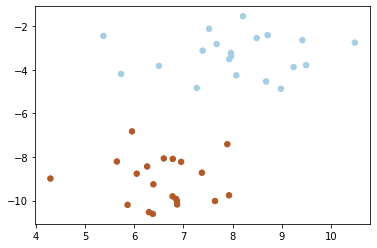

In [12]:
# from sklearn.datasets import make_blobs
import sklearn.inspection as insp
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel="linear", C=1000)
# clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
insp.DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()